# Task 1: Working with a dataset with categorical features

### Step 1, Reading the data

In [1]:
import pandas as pd
import numpy as np

class DataSet:
    def __init__(self, RawX=None, X=None, Y=None, File=None):
        self.RawX = RawX
        self.X = X
        self.Y = Y
        self.File = File

trainSet = DataSet(File="assets/adult_train.csv")
testSet = DataSet(File="assets/adult_test.csv")
datasets = [trainSet, testSet]

for dset in datasets:
    csvdat = pd.read_csv(dset.File)
    data_shuffled = csvdat.sample(frac=1.0, random_state=0)
    
    dset.RawX = data_shuffled.drop('target', axis=1)
    dset.Y = data_shuffled['target']

    print(f"{dset.File} has {len(dset.Y)} entires")

assets/adult_train.csv has 32561 entires
assets/adult_test.csv has 16281 entires


In [2]:
# Train Preview
print(trainSet.Y.head())
trainSet.RawX.head()

22278    <=50K
8950     <=50K
7838     <=50K
16505    <=50K
19140     >50K
Name: target, dtype: object


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
22278,49,Local-gov,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
8950,49,Private,HS-grad,9,Divorced,Other-service,Not-in-family,Black,Female,0,0,40,United-States
7838,31,Private,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States
16505,53,Private,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,43,United-States
19140,30,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States


### Step 2, Vectorize

In [3]:
from sklearn.feature_extraction import DictVectorizer
import json
 
xTrainRecords = trainSet.RawX.to_dict("records")
vectorizer = DictVectorizer(sparse=False)
xTrainEncoded = vectorizer.fit_transform(xTrainRecords)

testDict = testSet.RawX.to_dict("records")
testFit = vectorizer.transform(testDict)
testUnVectorized = vectorizer.inverse_transform(testFit)

print("As Dict", json.dumps(testDict[0], indent = 4))
print("Unvectorized ", json.dumps(testUnVectorized[0], indent = 4))

As Dict {
    "age": 44,
    "workclass": "Private",
    "education": "Some-college",
    "education-num": 10,
    "marital-status": "Married-civ-spouse",
    "occupation": "Transport-moving",
    "relationship": "Husband",
    "race": "White",
    "sex": "Male",
    "capital-gain": 0,
    "capital-loss": 0,
    "hours-per-week": 48,
    "native-country": "United-States"
}
Unvectorized  {
    "age": 44.0,
    "education-num": 10.0,
    "education=Some-college": 1.0,
    "hours-per-week": 48.0,
    "marital-status=Married-civ-spouse": 1.0,
    "native-country=United-States": 1.0,
    "occupation=Transport-moving": 1.0,
    "race=White": 1.0,
    "relationship=Husband": 1.0,
    "sex=Male": 1.0,
    "workclass=Private": 1.0
}


In [4]:
#Data to dictionary
for dset in datasets:
    dset.X = dset.RawX.to_dict("records")

### Step 3, Pipelining It

In [5]:
import sklearn as sk
from sklearn import tree
from sklearn.pipeline import make_pipeline
  
task1pipeline = sk.pipeline.make_pipeline(
  DictVectorizer(sparse=False),
  sk.tree.DecisionTreeClassifier()
)

task1pipeline.fit(trainSet.X, trainSet.Y)

Pipeline(steps=[('dictvectorizer', DictVectorizer(sparse=False)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [6]:
#Test pipeline
from sklearn.model_selection import cross_val_score
from statistics import mean

scores = cross_val_score(task1pipeline, trainSet.X, trainSet.Y)
mean(scores)

0.8198767132150365

In [7]:
# Peek Results
from IPython.display import display

testRawXCopy = testSet.RawX.copy()

testRawXCopy["result"] = testSet.Y
testRawXCopy["predict"] = task1pipeline.predict(testSet.X)

display(testRawXCopy)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result,predict
15729,44,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,48,United-States,>50K,<=50K
7077,37,Private,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,50,United-States,<=50K,<=50K
14946,35,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,45,United-States,<=50K,<=50K
9416,38,State-gov,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,<=50K,>50K
5739,41,Private,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,5013,0,30,United-States,<=50K,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,71,?,HS-grad,9,Widowed,?,Unmarried,White,Female,6612,0,42,United-States,>50K,<=50K
3264,30,State-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,<=50K,>50K
9845,54,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,>50K
10799,44,Self-emp-inc,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,>50K,>50K


# Task 2: Decision trees and random forests


In [8]:
import sklearn as sk
import time
depth2fittedDecision = {}
depths = [2**i for i in range(10)]
for d in depths:
    depth2fittedDecision[d] = sk.pipeline.make_pipeline(
        DictVectorizer(sparse=False),
        sk.tree.DecisionTreeClassifier(max_depth=d)
    )
    tbegin = time.perf_counter()
    
    depth2fittedDecision[d].fit(trainSet.X, trainSet.Y)

    tend = time.perf_counter()
    print(f"fitted:{d} in {tend-tbegin:0.4f}s")
tic = time.perf_counter()

fitted:1 in 0.5320s
fitted:2 in 0.5981s
fitted:4 in 0.6515s
fitted:8 in 0.7859s
fitted:16 in 0.9917s
fitted:32 in 1.0440s
fitted:64 in 1.1043s
fitted:128 in 1.2543s
fitted:256 in 1.1158s
fitted:512 in 1.1511s


In [9]:
from sklearn import ensemble

nEstimator2fittedForest = {}
n_estimators = [2**i for i in range(10)]
for n_est in n_estimators:
    nEstimator2fittedForest[n_est] = sk.pipeline.make_pipeline(
        DictVectorizer(sparse=False),
        sk.ensemble.RandomForestClassifier(n_estimators=n_est, n_jobs=-1)
    )
    tbegin = time.perf_counter()

    nEstimator2fittedForest[n_est].fit(trainSet.X, trainSet.Y)

    tend = time.perf_counter()
    print(f"fitted:{n_est} in {tend-tbegin:0.4f}s")

fitted:1 in 0.5454s
fitted:2 in 0.5889s
fitted:4 in 0.6292s
fitted:8 in 0.7607s
fitted:16 in 0.7449s
fitted:32 in 0.9883s
fitted:64 in 1.6094s
fitted:128 in 2.5936s
fitted:256 in 4.5744s
fitted:512 in 8.6662s


In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def graphCompareTestAndTrain(name2fitted, varDescription="", title=""):
    var2score_test = {}
    var2score_train = {}
    for var, pipe in name2fitted.items():
        y_test_real = testSet.Y
        y_test_pred = pipe.predict(testSet.X)
        y_train_real = trainSet.Y
        y_train_pred = pipe.predict(trainSet.X)

        pos_label = ">50K"

        var2score_test[var] = {
            "recall":   sk.metrics.recall_score(   y_test_real, y_test_pred, pos_label=pos_label),
            "precision":sk.metrics.precision_score(y_test_real, y_test_pred, pos_label=pos_label, zero_division=1),
            "f1":       sk.metrics.f1_score(       y_test_real, y_test_pred, pos_label=pos_label),
        }
        var2score_train[var] = {
            "recall":   sk.metrics.recall_score(   y_train_real, y_train_pred, pos_label=pos_label),
            "precision":sk.metrics.precision_score(y_train_real, y_train_pred, pos_label=pos_label, zero_division=1),
            "f1":       sk.metrics.f1_score(       y_train_real, y_train_pred, pos_label=pos_label),
        }

    plt.ylabel("Score")
    plt.ylim(0,1)
    plt.xlabel(varDescription)
    plt.xscale('log', base=2)

    for it, (setName,var2scores) in enumerate([("test", var2score_test),("train", var2score_train)]):
        varVal,scores = list(zip(*var2scores.items()))
        varVal = list(varVal)

        recall    = [x["recall"] for x in scores]
        precision = [x["precision"] for x in scores]
        f1        = [x["f1"] for x in scores]
        
        plt.plot(varVal, f1,        color=f"C{it}", linestyle="-", label=f"{setName} F1")
        plt.plot(varVal, recall,    color=f"C{it}", linestyle=":", label=f"{setName} Recall")
        plt.plot(varVal, precision, color=f"C{it}", linestyle="--", label=f"{setName} Precision")

    fakeLegends = [
        plt.Line2D([0],[0],color='0.5',linestyle="-"),
        plt.Line2D([0],[0],color='0.5',linestyle=":"),
        plt.Line2D([0],[0],color='0.5',linestyle="--"),
        mpl.patches.Patch(facecolor='C0',edgecolor='C0'),
        mpl.patches.Patch(facecolor='C1',edgecolor='C1')
    ]

    plt.legend(fakeLegends, ["F1","Recall","Precision","Test","Train"])
    plt.title(title)
    plt.show()
    

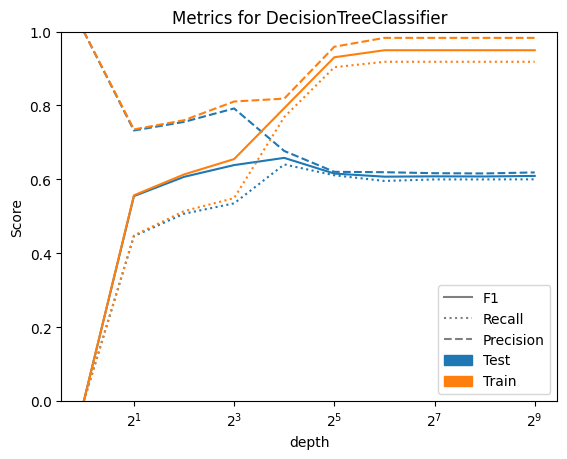

In [11]:
graphCompareTestAndTrain(depth2fittedDecision, varDescription="depth", title="Metrics for DecisionTreeClassifier")

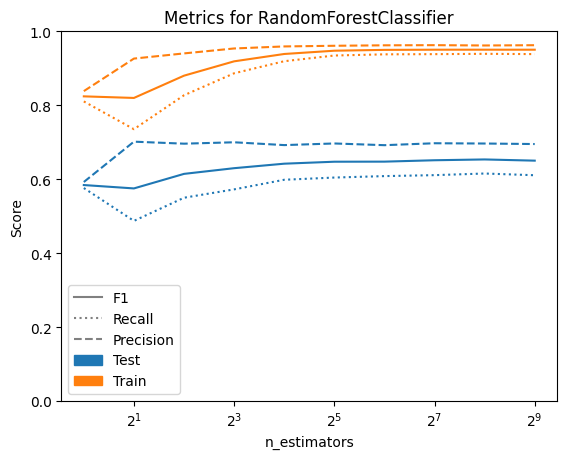

In [12]:
graphCompareTestAndTrain(nEstimator2fittedForest, varDescription="n_estimators", title="Metrics for RandomForestClassifier")

### Classifier Discussion
|                        | DecisionTreeClassifier | RandomForestClassifier |
| ---------------------- | ---------------------- | ---------------------- |
| Train Metrics          | Metrics Improve greatly from until it flattens to f1≈0.95 at depth>=32 | Metrics are relativly good for even the lowest depth at f1≈0.85. <br/>Flattening out to f1≈0.95 for estimators>=32. |
| Test Metrics           | Metrics improves very similarly to the training data until depth>=16 <br/> where it falls behind. For higher depths metrics becomes worse. <br/> Metrics are at their best with f1≈0.65 for depth=8 | Test set metrics are consitently worse than the Train set.<br/> The number of estimators makes little difference to this discrepancy. <br/>Flattens out at f1≈0.65 for estimators>=16. |
| Time      | Training time increases until it flattens out at ~depth>=32 <br/> Hard to see for smaller depths due to initialization time | Training time seems proportional to the number of estimators.<br/> Hard to see for smaller depths due to initialization time. |

- **DecisionTreeClassifier** <br/>
We can clearly see the model becoming overtrained for depths > 8. Increasingly memorizing the training set while the test metrics become worse.
The training data has 32561 enties. A Tree with the depth of 15 has up to 32768 leafs which is enough to encode all data. The total encompassing also likely explains why training time does not increase for depths higher than 16. The model doesn't create more trees as ~15 is already enough to store everything (the best it can).

- **RandomForestClassifier** <br/>
RandomForestClassifier does not show any overtraining problems. Its accuracy is just as good for any number of estimators greater or eaqual to 8 as as the DecisionTreeClassifier is at its best. 

F1 remains quite low with either classifer at its best. The data is not sufficent to make higher accuracy predictions.

# Task 3: Feature importances in random forest classifiers

In [38]:
def printImportance(fitted, name=""):
    vectoriserStep = fitted.steps[0][1]
    classifierStep = fitted.steps[1][1]

    featureNames = vectoriserStep.feature_names_
    featureImportances = classifierStep.feature_importances_
    
    df = pd.DataFrame(data={"feature":featureNames, "importance":featureImportances})
    df.sort_values(by=["importance"], inplace=True, ascending=False)
    pd.set_option('display.float_format',  '{:.4f}'.format)

    display(name)
    display(df)

printImportance(depth2fittedDecision[16], name="DecisionTreeClassifier, Depth = 16")
printImportance(nEstimator2fittedForest[16], name="RandomForestClassifier, Number of Classifiers = 16")

'DecisionTreeClassifier, Depth = 16'

,feature,importance
23,marital-status=Married-civ-spouse,0.31
3,education-num,0.17
1,capital-gain,0.16
0,age,0.09
20,hours-per-week,0.07
...,...,...
57,native-country=Peru,0.00
59,native-country=Poland,0.00
61,native-country=Puerto-Rico,0.00
62,native-country=Scotland,0.00


'RandomForestClassifier, Number of Classifiers = 16'

,feature,importance
0,age,0.22
20,hours-per-week,0.12
1,capital-gain,0.11
23,marital-status=Married-civ-spouse,0.07
90,relationship=Husband,0.05
...,...,...
56,native-country=Outlying-US(Guam-USVI-etc),0.00
72,occupation=Armed-Forces,0.00
101,workclass=Never-worked,0.00
44,native-country=Honduras,0.00


### Alternative Approach to find imporance scores
